In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv(r"C:\Users\Vikas\Downloads\MSFT (2).csv")

new_df=df.dropna(axis=0,how='any')

x=new_df.iloc[:,1:4].values
y=new_df.iloc[:,4:5].values

In [4]:
new_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063292,308160000
1,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064384,133171200
2,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062746,67766400
3,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061655,47894400
4,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.060018,58435200


In [5]:
new_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9131.000000,9131.000000,9131.000000,9131.000000,9131.000000,9.131000e+03
mean,42.616252,43.069085,42.147466,42.623735,37.471295,5.850393e+07
std,62.075887,62.690031,61.402226,62.080437,62.303076,3.702835e+07
min,0.090278,0.092014,0.089410,0.090278,0.056745,2.304000e+06
25%,4.406250,4.468750,4.363281,4.410156,2.772026,3.444045e+07
50%,26.870001,27.150000,26.590000,26.879999,18.943903,5.188550e+07
75%,40.521250,41.015000,39.937500,40.400002,29.447977,7.243200e+07
max,344.619995,349.670013,342.200012,343.109985,341.606354,7.886880e+08


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.30,random_state=42)

In [7]:
''''from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
def select_features(X_train, Y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, Y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))'''



from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(X_train, Y_train)

LinearRegression()

In [8]:
lr_pred=lrmodel.predict(X_test)

lr_results=[]

lr_rmse = math.sqrt(mean_squared_error(Y_test,lr_pred))
lr_r2=r2_score(Y_test,lr_pred)

lr_results.append(lr_rmse)
lr_results.append(lr_r2)


print(lr_results)

[0.5703699571933534, 0.999919854857716]


Text(0, 0.5, 'Close Price')

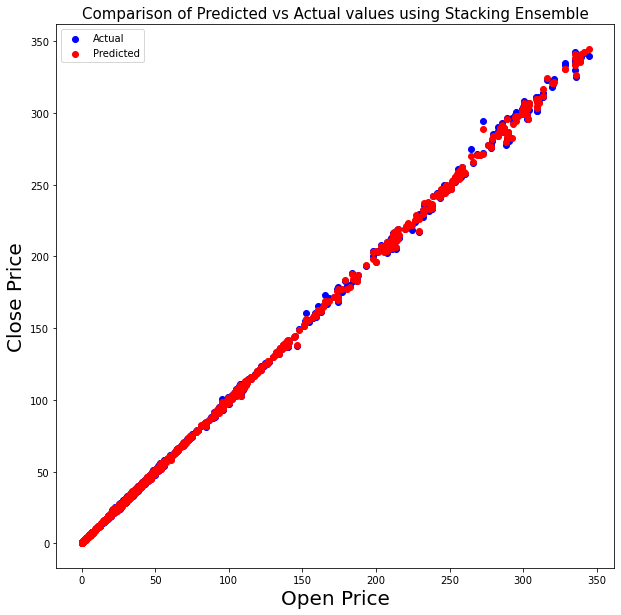

In [9]:
x_test=[]
for i in range(len(X_test)):
    
    x_test.append(X_test[i][0])

x_test=np.array(x_test)
x_test.reshape([len(X_test),1])

plt.figure(figsize=(10,10))
plt.title("Comparison of Predicted vs Actual values using Stacking Ensemble",size='15')
plt.scatter(x_test,Y_test,color='blue',label='Actual')
plt.scatter(x_test,lr_pred,color='red',label="Predicted")
plt.legend()
plt.xlabel("Open Price",size='20')
plt.ylabel("Close Price",size='20')

In [10]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.8602429423329654
RMSE value for k=  2 is: 0.7740900507377322
RMSE value for k=  3 is: 0.7678867074263589
RMSE value for k=  4 is: 0.7642789430788575
RMSE value for k=  5 is: 0.7470915641485949
RMSE value for k=  6 is: 0.7644951000368929
RMSE value for k=  7 is: 0.7730038679202071
RMSE value for k=  8 is: 0.788179771670236
RMSE value for k=  9 is: 0.7942056702413299
RMSE value for k=  10 is: 0.803716534555645
RMSE value for k=  11 is: 0.8185513404567687
RMSE value for k=  12 is: 0.8274594113434617
RMSE value for k=  13 is: 0.8382209188470159
RMSE value for k=  14 is: 0.8499604367052445
RMSE value for k=  15 is: 0.8484173569711124
RMSE value for k=  16 is: 0.858432527554923
RMSE value for k=  17 is: 0.8699230251103381
RMSE value for k=  18 is: 0.8749861752536711
RMSE value for k=  19 is: 0.877363297174994
RMSE value for k=  20 is: 0.8800342709185922


In [11]:
knn_model= neighbors.KNeighborsRegressor(n_neighbors = 4)
knn_model.fit(X_train,Y_train)

knn_pred=knn_model.predict(X_test)

In [12]:
knn_rmse = math.sqrt(mean_squared_error(Y_test,knn_pred))
knn_r2=r2_score(Y_test,knn_pred)

knn_results=[]

knn_results.append(knn_rmse)
knn_results.append(knn_r2)


print(knn_results)

[0.7642789430788575, 0.9998560977087959]


Text(0, 0.5, 'Close')

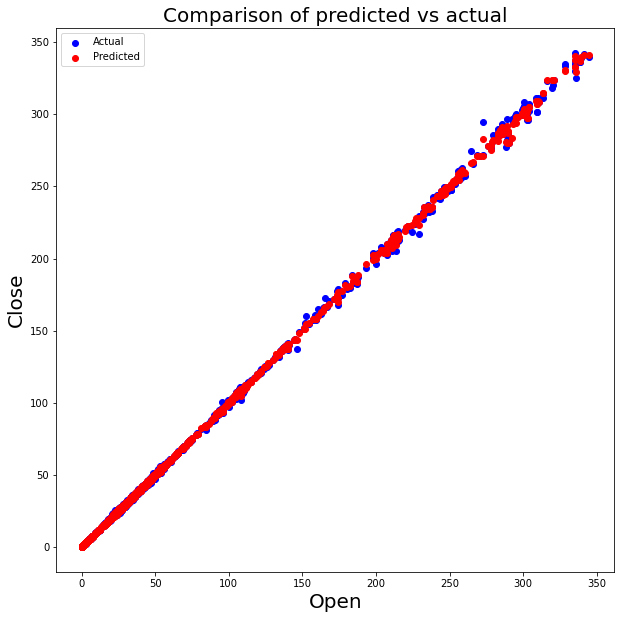

In [13]:
x_test=[]
for i in range(len(X_test)):
    
    x_test.append(X_test[i][0])

x_test=np.array(x_test)
x_test.reshape([len(X_test),1])

plt.figure(figsize=(10,10))
plt.title("Comparison of predicted vs actual",size='20')
plt.scatter(x_test,Y_test,color='blue',label='Actual')
plt.scatter(x_test,knn_pred,color='red',label="Predicted")
plt.legend()
plt.xlabel("Open",size='20')
plt.ylabel("Close",size='20')

In [14]:
''''from sklearn.model_selection import GridSearchCV
rf_params = {
    'C': [1,10, 100],
    "kernel":['poly','rbf','linear'],
    "epsilon":[0.01,0.1,1]
}
clf = SVR(gamma='scale')
grid = GridSearchCV(clf, rf_params)
grid.fit(X_train, Y_train)
print(grid.best_params_)'''

svrmodel=SVR(kernel='linear',C=100, epsilon=0.01)
svrmodel.fit(X_train,Y_train)

svr_pred=svrmodel.predict(X_test)

C:\Users\Vikas\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [12]:
svr_pred=svr_pred.reshape([len(X_test),1])
svr_results=[]
svr_rmse = math.sqrt(mean_squared_error(Y_test,svr_pred))
svr_r2=r2_score(Y_test,svr_pred)


svr_results.append(svr_rmse)
svr_results.append(svr_r2)


print(svr_results)

[0.6251941437166683, 0.9999037072205432]


Text(0, 0.5, 'Close')

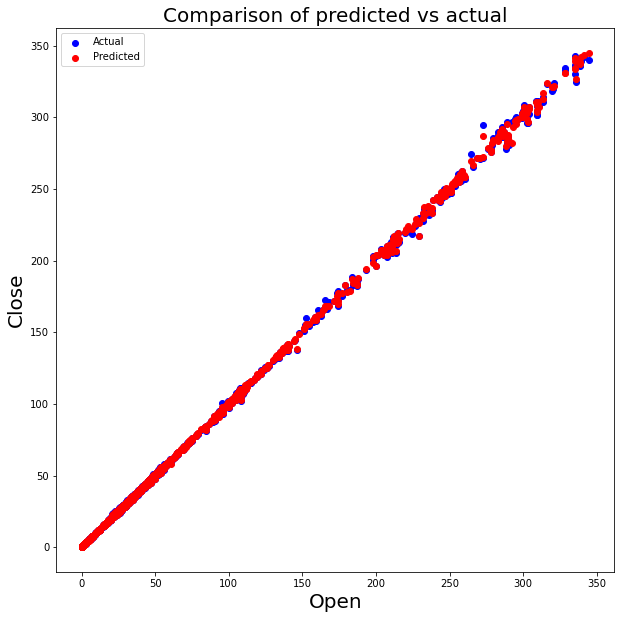

In [15]:
x_test=[]
for i in range(len(X_test)):
    
    x_test.append(X_test[i][0])

x_test=np.array(x_test)
x_test.reshape([len(X_test),1])

plt.figure(figsize=(10,10))
plt.title("Comparison of predicted vs actual",size='20')
plt.scatter(x_test,Y_test,color='blue',label='Actual')
plt.scatter(x_test,svr_pred,color='red',label="Predicted")
plt.legend()
plt.xlabel("Open",size='20')
plt.ylabel("Close",size='20')

In [16]:
stack_train=np.column_stack((svr_pred,lr_pred,knn_pred,X_test))
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(stack_train, Y_test)
stackpredict=lrmodel.predict(stack_train)


stack_rmse = math.sqrt(mean_squared_error(Y_test,stackpredict))
stack_mse=mean_squared_error(Y_test,stackpredict)
stack_r2=r2_score(Y_test,stackpredict)

stack_results=[]

stack_results.append(stack_rmse)
stack_results.append(stack_r2)
stack_results.append(stack_mse)

print(stack_results)

[0.5377327277188236, 0.9999287644373169, 0.28915648645992653]


Text(0, 0.5, 'Close Price')

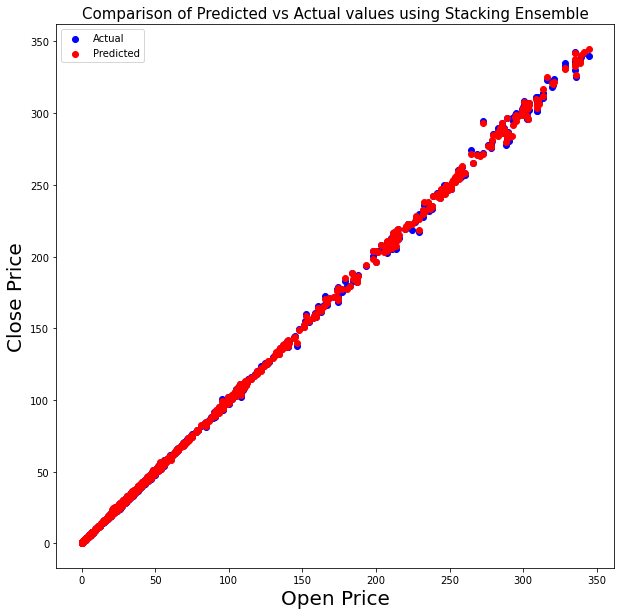

In [17]:
x_test=[]
for i in range(len(X_test)):
    
    x_test.append(X_test[i][0])

x_test=np.array(x_test)
x_test.reshape([len(X_test),1])

plt.figure(figsize=(10,10))
plt.title("Comparison of Predicted vs Actual values using Stacking Ensemble",size='15')
plt.scatter(x_test,Y_test,color='blue',label='Actual')
plt.scatter(x_test,stackpredict,color='red',label="Predicted")
plt.legend()
plt.xlabel("Open Price",size='20')
plt.ylabel("Close Price",size='20')

In [19]:
svr_pred=svr_pred.reshape([len(svr_pred),1])
def avg_predictions(svr_pred,lr_y_pred,knn_pred):
    average_predictions=(svr_pred+lr_y_pred+knn_pred)/3.0
    return average_predictions

average_predictions=avg_predictions(svr_pred,lr_pred,knn_pred)

results=[]
avg_rmse = math.sqrt(mean_squared_error(Y_test,average_predictions))
avg_r2=r2_score(Y_test,average_predictions)
results.append(avg_rmse)
results.append(avg_r2)


print(results)

[0.6170006380021053, 0.9999062146191577]


Text(0, 0.5, 'Close Prize')

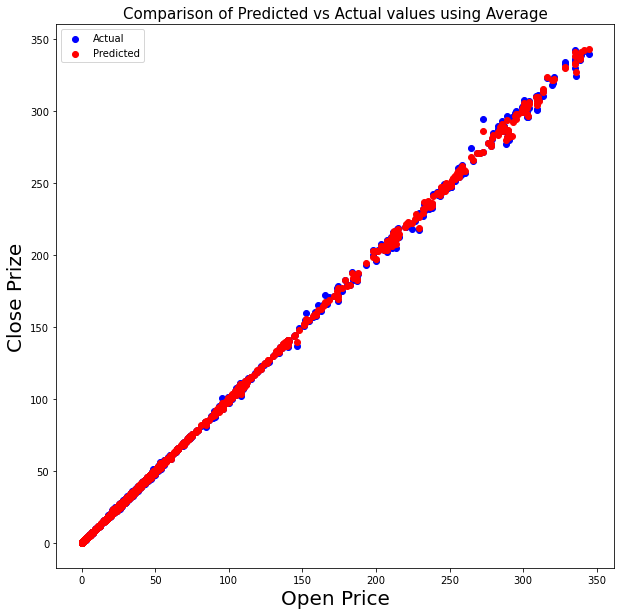

In [20]:
x_test=[]
for i in range(len(X_test)):
    
    x_test.append(X_test[i][0])

x_test=np.array(x_test)
x_test.reshape([len(X_test),1])
plt.figure(figsize=(10,10))
plt.title("Comparison of Predicted vs Actual values using Average",size='15')
plt.scatter(x_test,Y_test,color='blue',label="Actual")
plt.scatter(x_test,average_predictions,color='red',label="Predicted")
plt.legend()
plt.xlabel("Open Price",size='20')
plt.ylabel("Close Prize",size='20')

In [46]:
import xgboost
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor


reg=BaggingRegressor(base_estimator=XGBRegressor(),n_estimators=10,max_samples=6000)

reg.fit(X_train,Y_train)

baggingpred=reg.predict(X_test)

bag_rmse = math.sqrt(mean_squared_error(Y_test,baggingpred))
bag_r2=r2_score(Y_test,baggingpred)

bag_results=[]

bag_results.append(bag_rmse)
bag_results.append(bag_r2)


print(bag_results)

C:\Users\Vikas\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0.8200136681228176, 0.9998343444072642]


Text(0, 0.5, 'Close Price')

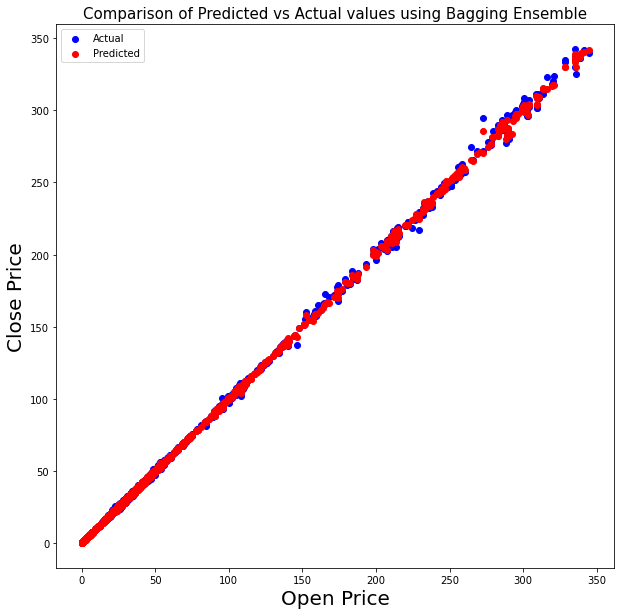

In [47]:
x_test=[]
for i in range(len(X_test)):
    
    x_test.append(X_test[i][0])

x_test=np.array(x_test)
x_test.reshape([len(X_test),1])
plt.figure(figsize=(10,10))
plt.title("Comparison of Predicted vs Actual values using Bagging Ensemble",size='15')
plt.scatter(x_test,Y_test,color='blue',label="Actual")
plt.scatter(x_test,baggingpred,color='red',label="Predicted")
plt.legend()
plt.xlabel("Open Price",size='20')
plt.ylabel("Close Price",size='20')

In [48]:
def weight_avg_predictions(svr_pred,lr_y_pred,knn_pred):
    average_predictions=(-1.645 *svr_pred+2.608*lr_y_pred+0.0413*knn_pred)
    return average_predictions

weight_average_predictions=weight_avg_predictions(svr_pred,lr_pred,knn_pred)

weighted_results=[]

wd_rmse = math.sqrt(mean_squared_error(Y_test,weight_average_predictions))
wd_r2=r2_score(Y_test,weight_average_predictions)



weighted_results.append(wd_rmse)
weighted_results.append(wd_r2)


print(weighted_results)

[0.5594323960806442, 0.9999228991537907]


Text(0, 0.5, 'Close Price')

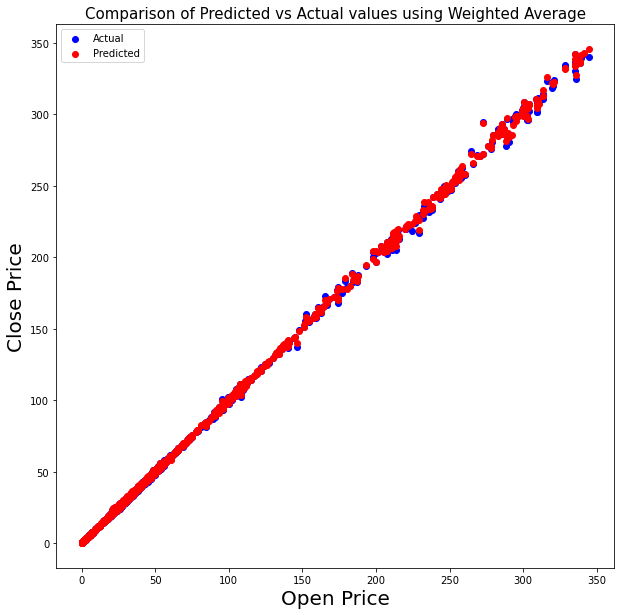

In [49]:
x_test=[]
for i in range(len(X_test)):
    
    x_test.append(X_test[i][0])

x_test=np.array(x_test)
x_test.reshape([len(X_test),1])
plt.figure(figsize=(10,10))
plt.title("Comparison of Predicted vs Actual values using Weighted Average",size='15')
plt.scatter(x_test,Y_test,color='blue',label="Actual")
plt.scatter(x_test,weight_average_predictions,color='red',label="Predicted")
plt.legend()
plt.xlabel("Open Price",size='20')
plt.ylabel("Close Price",size='20')

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [67]:
model = Sequential()

In [68]:
model.add(Dense(3, input_dim=3, activation='relu'))

In [69]:
model.add(Dense(3, input_dim=3, activation='relu'))

In [70]:
model.add(Dense(1)) 

In [71]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [72]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 12        
                                                                 
 dense_7 (Dense)             (None, 3)                 12        
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
None


In [73]:
history = model.fit(X_train, Y_train ,verbose=1, epochs=500, 
                    validation_data=(X_test, Y_test))

Epoch 1/500
200/200 [==============================] - 1s 1ms/step - loss: 3646.7874 - val_loss: 2137.4146
Epoch 2/500
200/200 [==============================] - 0s 1ms/step - loss: 680.1327 - val_loss: 36.5445
Epoch 3/500
200/200 [==============================] - 0s 1ms/step - loss: 5.2686 - val_loss: 1.0857
Epoch 4/500
200/200 [==============================] - 0s 1ms/step - loss: 0.8828 - val_loss: 1.0548
Epoch 5/500
200/200 [==============================] - 0s 1ms/step - loss: 0.8615 - val_loss: 1.0364
Epoch 6/500
200/200 [==============================] - 0s 1ms/step - loss: 0.8421 - val_loss: 1.0031
Epoch 7/500
200/200 [==============================] - 0s 1ms/step - loss: 0.8165 - val_loss: 0.9889
Epoch 8/500
200/200 [==============================] - 0s 1ms/step - loss: 0.7880 - val_loss: 0.9493
Epoch 9/500
200/200 [==============================] - 0s 1ms/step - loss: 0.7614 - val_loss: 0.9197
Epoch 10/500
200/200 [==============================] - 0s 1ms/step - loss: 0.7344

In [74]:
mlp_pred = model.predict(X_test)

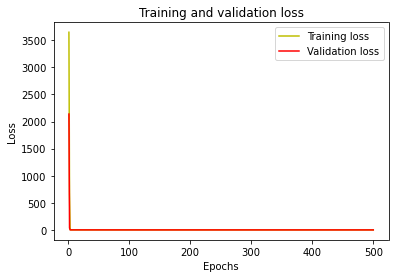

In [75]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [76]:
for layer_depth, layer in enumerate(model.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('Layer', layer_depth)
    for toNeuronNum, bias in enumerate(biases):
        print(f'Bias to Layer{layer_depth+1}Neuron{toNeuronNum}: {bias}')
    
    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print(f'Layer{layer_depth}Neuron{fromNeuronNum}   to    Layer{layer_depth+1}Neuron{toNeuronNum} = {wgt2}')

Layer 0
Bias to Layer1Neuron0: 0.0
Bias to Layer1Neuron1: -0.1232343316078186
Bias to Layer1Neuron2: 0.0
Layer0Neuron0   to    Layer1Neuron0 = -0.06946086883544922
Layer0Neuron0   to    Layer1Neuron1 = -0.12035119533538818
Layer0Neuron0   to    Layer1Neuron2 = 0.09933614730834961
Layer0Neuron1   to    Layer1Neuron0 = -0.45201539993286133
Layer0Neuron1   to    Layer1Neuron1 = 0.6975215673446655
Layer0Neuron1   to    Layer1Neuron2 = 0.09555292129516602
Layer0Neuron2   to    Layer1Neuron0 = -0.1666879653930664
Layer0Neuron2   to    Layer1Neuron1 = 0.6976531147956848
Layer0Neuron2   to    Layer1Neuron2 = -0.455446720123291
Layer 1
Bias to Layer2Neuron0: 0.0
Bias to Layer2Neuron1: -0.02338249422609806
Bias to Layer2Neuron2: 0.0
Layer1Neuron0   to    Layer2Neuron0 = -0.16719460487365723
Layer1Neuron0   to    Layer2Neuron1 = -0.6152057647705078
Layer1Neuron0   to    Layer2Neuron2 = -0.3313863277435303
Layer1Neuron1   to    Layer2Neuron0 = -0.1871199607849121
Layer1Neuron1   to    Layer2Neuron

In [77]:
mlp_results=[]

mlp_rmse = math.sqrt(mean_squared_error(Y_test,mlp_pred))
mlp_r2=r2_score(Y_test,mlp_pred)
mlp_mse=mean_squared_error(Y_test,mlp_pred)

mlp_results.append(mlp_rmse)
mlp_results.append(mlp_r2)
mlp_results.append(mlp_mse)

print(mlp_results)

[0.6838822736176455, 0.9998847803334988, 0.46769496416844025]


Text(0, 0.5, 'Close')

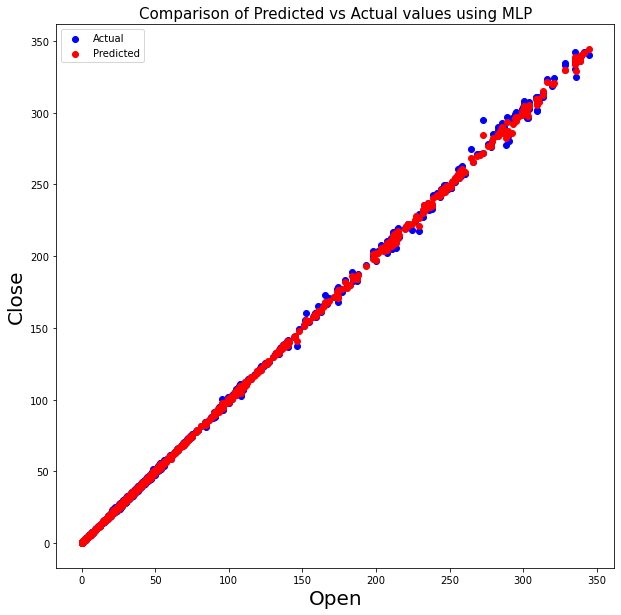

In [78]:
x_test=[]
for i in range(len(X_test)):
    
    x_test.append(X_test[i][0])

x_test=np.array(x_test)
x_test.reshape([len(X_test),1])
plt.figure(figsize=(10,10))
plt.title("Comparison of Predicted vs Actual values using MLP",size='15')
plt.scatter(x_test,Y_test,color='blue',label="Actual")
plt.scatter(x_test,mlp_pred,color='red',label="Predicted")
plt.legend()
plt.xlabel("Open",size='20')
plt.ylabel("Close",size='20')